In [1]:
state = 'NE' 
year = 2020

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json
from epsilon_constraint import*
import networkx as nx

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of NE has 3 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))

from NE_plans import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 0 plans from file.


In [6]:
obj_type = 'perimeter'
starting_deviation = 0.01 
verbose = True
contiguity = 'lcut'               # {'lcut', 'scf', 'shir'}
warm_start_mode = 'user'          # {'None', 'user', 'refinement'}
warm_starts = None                # if you have user define warm strats else it is None
time_limit = 7200                 # Time limit in seconds, adjust as needed
multiplier = 0                    # Adjust multiplier as needed
max_B = True                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True
symmetry_breaking = 'orbitope'    # {None, 'orbitope', 'rsum'}              
sizes = None

In [7]:
print(f"Running epsilon constraint method for state {state}, objective {obj_type}")
print(f"{'#' * 100}\n")
(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity,        
            cutoff=None,       
            verbose=verbose,
            warm_start_mode = warm_start_mode,
            warm_starts=warm_starts,  
            starting_deviation=starting_deviation, 
            time_limit=time_limit, 
            sizes=sizes,      
            max_B=max_B,      
            symmetry_breaking=symmetry_breaking, 
        )

Running epsilon constraint method for state NE, objective perimeter
####################################################################################################

L = 647297 and U = 660373

****************************************
Trying deviation = 6538.346666666666
****************************************
No valid warm start used.

****************************************
Running labeling model!
****************************************
L = 647297 and U = 660373
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (

Set parameter LazyConstraints to value 1
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 3804 rows, 3243 columns and 12403 nonzeros
Model fingerprint: 0x7d0ecaf8
Variable types: 837 continuous, 2406 integer (2406 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+05]
  Objective range  [8e-04, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1986 rows and 1409 columns
Presolve time: 0.02s
Presolved: 1818 rows, 1834 columns, 6332 nonzeros
Variable types: 0


CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 3804 rows, 3243 columns and 12403 nonzeros
Model fingerprint: 0xa4c67498
Variable types: 837 continuous, 2406 integer (2406 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+05]
  Objective range  [8e-04, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1986 rows and 1409 columns
Presolve time: 0.01s
Presolved: 1818 rows, 1834 columns, 6332 nonzeros
Variable types: 0 continuous, 1834 integer (1834 binary)

Root relaxation: objective 2.837546e+01, 1101 iterations, 0.05 seconds (0.04 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node T

  3573  2546   45.58870   22   93          -   30.93219      -   102   10s
  8762  5232   33.95276   30  207          -   32.08001      -  81.8   15s
 14903  9270   53.06549   34  167          -   33.44161      -  79.8   20s
 20349 12157 infeasible   81               -   34.44510      -  82.2   25s
 25800 15567   44.84614   36  260          -   35.07772      -  83.3   30s
 31714 18379   45.25675   30  239          -   35.63591      -  83.0   36s
 35755 20882   47.84591   45   56          -   35.90259      -  82.0   40s
 42268 23447   49.81718   36  234          -   36.13625      -  81.3   45s
*43461 15858              63      51.8701092   36.21965  30.2%  81.0   48s
 45312 16054 infeasible   57        51.87011   36.31180  30.0%  80.8   50s
H49221  5028                      40.7645502   36.55750  10.3%  81.2   53s
 49501  4277     cutoff   33        40.76455   36.65189  10.1%  81.1   55s
H54090   603                      38.2716420   37.44309  2.16%  81.0   59s

Cutting planes:
  Gomory


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   28.38435    0  281          -   28.38435      -     -    0s
     0     0   28.71470    0  257          -   28.71470      -     -    0s
     0     0   28.88450    0  249          -   28.88450      -     -    0s
     0     0   28.88518    0  342          -   28.88518      -     -    0s
     0     0   28.88534    0  342          -   28.88534      -     -    0s
     0     0   28.89086    0  347          -   28.89086      -     -    0s
     0     0   28.89418    0  349          -   28.89418      -     -    0s
     0     0   28.89527    0  350          -   28.89527      -     -    1s
     0     0   28.89654    0  346          -   28.89654      -     -    1s
     0     0   28.95610    0  334          -   28.95610      -     -    1s
     0     0   28.95691    0  332          -   28.95691      -     -    1s
     0     0   28.95691

 124351  8801   43.57221   27  113   44.22052   41.14298  6.96%  92.5  120s
 129258  7158   42.30982   29  153   44.22052   41.69056  5.72%  91.8  125s
 134568  5315 infeasible   30        44.22052   42.12468  4.74%  90.6  130s
 139965  2244     cutoff   49        44.22052   42.80207  3.21%  89.2  135s

Cutting planes:
  Gomory: 3
  MIR: 2
  Zero half: 3
  RLT: 5
  BQP: 1
  Lazy constraints: 489

Explored 144583 nodes (12638354 simplex iterations) in 137.14 seconds (70.69 work units)
Thread count was 20 (of 20 available processors)

Solution count 2: 44.2205 44.2275 

Optimal solution found (tolerance 0.00e+00)
Best objective 4.422052413506e+01, best bound 4.422052413506e+01, gap 0.0000%

User-callback calls 297839, time in user-callback 5.99 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
[[10, 13, 43, 44, 72, 74, 76, 77], [6, 7, 22, 28, 33, 47, 48, 60, 64, 65, 69, 71, 87, 91], [0, 1, 2, 3, 4, 5, 8, 9, 11,

  MIR: 2
  StrongCG: 1
  Flow cover: 2
  GUB cover: 1
  Inf proof: 6
  Zero half: 4
  RLT: 10
  Lazy constraints: 670

Explored 218861 nodes (16414384 simplex iterations) in 277.98 seconds (90.96 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 45.8964 

Optimal solution found (tolerance 0.00e+00)
Best objective 4.589637576140e+01, best bound 4.589637576140e+01, gap 0.0000%

User-callback calls 452768, time in user-callback 10.88 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
[[10, 13, 43, 44, 72, 74, 76, 77], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91], [0, 1, 2, 3, 4, 5, 8, 9, 11, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 46, 49, 52, 53, 54, 55, 56, 57, 58, 59, 62, 63, 64, 66, 67, 68, 70, 73, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 92]]

*************************************

 178281 105556   49.02043   34  142          -   37.98826      -  56.5  282s
 179025 106544   51.30613   71  188          -   37.98983      -  56.5  286s
 182820 108413   56.14914   36  264          -   38.07432      -  56.6  293s
 185148 109586   60.10924   39  201          -   38.10274      -  56.6  298s
 187450 110285   45.35526   35  280          -   38.11411      -  56.5  301s
 189101 111278   52.74938   52  205          -   38.15544      -  56.6  305s
 193163 113458   39.07381   33  250          -   38.25555      -  56.6  311s
 197642 115431   40.47683   21  372          -   38.34476      -  56.6  318s
 199646 115865   39.12339   46  241          -   38.35300      -  56.6  321s
 202843 117314 infeasible   38               -   38.43409      -  56.6  327s
 204415 118075   50.93373   32  253          -   38.45659      -  56.7  330s
 208276 119477   43.61530   54  120          -   38.55746      -  56.8  338s
 209935 120199   46.37559   35   90          -   38.59959      -  56.8  342s

 404967 171993   49.79491   47   44          -   43.59550      -  61.4  826s
 405110 172567   49.73554   48   84          -   43.59550      -  61.4  831s
 406824 172903   51.70116   46   67          -   43.62720      -  61.5  835s
 408327 173406   52.36627   46  228          -   43.65210      -  61.5  840s
 410231 174044   47.32898   43   57          -   43.67775      -  61.5  845s
 413770 175095   54.04615   42  243          -   43.73361      -  61.6  853s
 415507 175603   51.76740   33   90          -   43.75238      -  61.6  857s
 417172 176051   44.93328   34  125          -   43.78659      -  61.7  861s
 418736 176629 infeasible   37               -   43.80892      -  61.7  865s
 420596 177076   44.59374   31  465          -   43.83719      -  61.7  871s
 422271 177833   46.48798   35  274          -   43.86125      -  61.8  875s
 424151 178282   46.74374   38  180          -   43.88732      -  61.8  880s
 425737 178949   56.83806   51  114          -   43.90814      -  61.8  885s

 610614 80485   48.41534   35  151   50.76264   45.71157  10.0%  63.3 1365s
 612607 80375   49.51582   32  428   50.76264   45.74447  9.89%  63.4 1375s
 615736 80269   46.71241   44   71   50.76264   45.79190  9.79%  63.4 1381s
 618079 80147   46.88235   41  153   50.76264   45.81878  9.74%  63.4 1386s
 620128 79948 infeasible   44        50.76264   45.84537  9.69%  63.4 1391s
 622481 79908     cutoff   39        50.76264   45.88073  9.62%  63.4 1396s
 623466 79894     cutoff   42        50.76264   45.88524  9.61%  63.3 1400s
H626921 74798                      50.4214059   45.93155  8.90%  63.4 1404s
 627163 74733     cutoff   32        50.42141   45.95956  8.85%  63.4 1408s
 628198 74725 infeasible   31        50.42141   45.96913  8.83%  63.3 1412s
 629501 74579   49.84003   44  100   50.42141   45.97462  8.82%  63.3 1418s
 631259 74399     cutoff   34        50.42141   45.98228  8.80%  63.3 1423s
 634305 74047   47.69639   29  309   50.42141   46.04809  8.67%  63.3 1428s
 636892 7378

  2108  1890   38.06423   22   74          -   30.10555      -  70.7   10s
  4332  3198   44.51750   59   72          -   30.41770      -  74.4   15s
  7386  4771   32.10121   18  240          -   30.78982      -  72.1   20s
 11900  8822   34.36543   48   51          -   31.11971      -  65.9   25s
 18320 13766   43.73609   60   60          -   31.29004      -  61.7   30s
 22931 17630   37.28261   29  162          -   32.27016      -  60.5   35s
 27004 20709   52.95968  109   29          -   32.46330      -  60.1   40s
 32769 25262   41.75101   31   54          -   32.70762      -  60.0   45s
 36525 26973   42.49008   45   70          -   32.77724      -  59.2   50s
 40573 31302   42.10691   31  116          -   32.88259      -  58.4   55s
 46703 34977   42.41174   62  371          -   33.05646      -  58.3   60s
 53722 40798   46.15997   55   64          -   33.17726      -  57.2   66s
 58782 44168 infeasible   83               -   33.33058      -  56.9   70s
 62078 46762   33.90389  

 505081 253274   48.63464   35  236          -   40.84523      -  67.0  554s
 509660 253279 infeasible   31               -   40.84970      -  67.0  555s
 514141 254037   45.41829   30  249          -   41.04654      -  67.1  561s
 517151 254318   43.14549   35  282          -   41.14815      -  67.2  566s
 521816 254973   46.47445   50   44          -   41.23368      -  67.3  572s
 525019 255182 infeasible   36               -   41.35173      -  67.4  579s
 525116 255576 infeasible   28               -   41.35173      -  67.4  581s
 528442 256350   50.10638   32   73          -   41.38688      -  67.4  585s
 531695 256571   45.10273   32  149          -   41.47010      -  67.5  590s
 537432 256992   46.07304   30  314          -   41.64198      -  67.6  596s
 540668 257500   48.14142   34  318          -   41.72746      -  67.6  600s
 543995 258271   47.79230   34  141          -   41.80615      -  67.6  605s
 549020 258854 infeasible   30               -   41.90736      -  67.7  611s

 870817 330483   49.87549   37  290          -   46.47442      -  68.3 1086s
 874237 331558 infeasible   30               -   46.50862      -  68.3 1091s
 876001 332060   50.96165   70   76          -   46.52108      -  68.3 1095s
 879592 333017   56.58655   59   16          -   46.56115      -  68.3 1102s
 881579 333587   57.63750   52   35          -   46.57181      -  68.3 1106s
 885108 334652   53.40288   34  335          -   46.60437      -  68.3 1112s
 886888 334819   63.22642   47   83          -   46.61943      -  68.3 1116s
 889379 336297   64.98766   46  300          -   46.63160      -  68.3 1122s
 891406 336829 infeasible   53               -   46.65436      -  68.3 1125s
 894999 337881   53.21032   48  402          -   46.67139      -  68.2 1132s
 896894 338369 infeasible   51               -   46.69151      -  68.2 1135s
 900208 339207   49.39309   31  227          -   46.72195      -  68.2 1141s
 903714 340131 infeasible   48               -   46.76041      -  68.2 1147s

 1125175 103463   51.19015   40  265   53.55461   49.64187  7.31%  67.5 1620s
 1127670 103242   52.62504   49  286   53.55461   49.68000  7.23%  67.5 1626s
 1129785 102846   52.81077   66  163   53.55461   49.69745  7.20%  67.5 1631s
 1131932 102414   52.30465   35  352   53.55461   49.72650  7.15%  67.4 1636s
 1134072 101968     cutoff   51        53.55461   49.75540  7.09%  67.4 1641s
 1136185 101530   51.32208   59   62   53.55461   49.77932  7.05%  67.4 1646s
 1138325 100998   50.78639   42  308   53.55461   49.80191  7.01%  67.4 1651s
 1140529 100568   51.51024   40  243   53.55461   49.83122  6.95%  67.3 1656s
 1142715 100016     cutoff   38        53.55461   49.85589  6.91%  67.3 1660s
 1144716 99493   52.46304   41  393   53.55461   49.88796  6.85%  67.3 1665s
 1146743 98874 infeasible   48        53.55461   49.90810  6.81%  67.3 1670s
 1150904 97791 infeasible   60        53.55461   49.97112  6.69%  67.3 1679s
 1153156 97318     cutoff   37        53.55461   49.99194  6.65%  6

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 3804 rows, 3243 columns and 12403 nonzeros
Model fingerprint: 0x44a25185
Variable types: 837 continuous, 2406 integer (2406 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+05]
  Objective range  [8e-04, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1993 row

 427684 255721 infeasible   40               -   37.42564      -  57.8  402s
 431433 257589   39.54568   29  275          -   37.44597      -  57.8  405s
 435141 258932   58.48934   53   62          -   37.47385      -  57.9  411s
 437797 260460   48.77225   43  404          -   37.49423      -  58.0  415s
 441537 262228   45.83355   50  190          -   37.52544      -  58.0  420s
 447224 264361   42.66796   35   47          -   37.57685      -  58.1  425s
 449584 265424   51.76272   62   52          -   37.60656      -  58.1  431s
 455755 267923   48.40428   53  314          -   37.65634      -  58.1  436s
 459267 269408   43.74780   36  164          -   37.68023      -  58.2  440s
 465229 272161   51.28925   50   77          -   37.73216      -  58.2  445s
 470619 274156   50.05389   48  113          -   37.76980      -  58.3  452s
 471580 275124   46.69105   74   55          -   37.76980      -  58.3  455s
 477355 278069   45.91327   42  157          -   37.81307      -  58.3  460s

 857296 428580   52.25035   41  365          -   40.63943      -  60.5  937s
 859037 429254   42.61954   34  124          -   40.65474      -  60.5  940s
 862982 430452   72.20170   65  119          -   40.68990      -  60.5  946s
 866615 431928   51.19264   39   33          -   40.71370      -  60.5  952s
 868749 432497   41.00756   28  305          -   40.73485      -  60.5  955s
 870616 432533   48.01241   45  282          -   40.74627      -  60.5  962s
 870854 433246 infeasible   45               -   40.74669      -  60.5  965s
 874631 434227   51.57781   31  361          -   40.78183      -  60.5  971s
 878155 435547   46.79448   42  352          -   40.80675      -  60.5  977s
 880071 436211 infeasible   48               -   40.83100      -  60.5  981s
 883982 437641   60.32446   49  228          -   40.85581      -  60.5  987s
 885951 438075   43.65782   30  261          -   40.87858      -  60.5  990s
 889999 439218   45.42826   49  212          -   40.91363      -  60.5  997s

 1138320 484718 infeasible   48               -   43.49384      -  60.6 1490s
 1141466 484362 infeasible   38               -   43.53219      -  60.6 1498s
 1143897 484335   48.25703   38  113          -   43.56705      -  60.5 1502s
 1145930 484198   47.29298   50  161          -   43.59993      -  60.5 1507s
 1147956 484096   49.66775   44  158          -   43.60533      -  60.5 1510s
 1149997 484219   48.44600   68  148          -   43.64709      -  60.5 1515s
 1154300 483833 infeasible   43               -   43.72598      -  60.5 1523s
 1156178 483834   46.39463   32  241          -   43.74837      -  60.5 1527s
 1158380 483851   48.98781   36  290          -   43.79379      -  60.5 1538s
 1158611 484144   49.48788   38  149          -   43.79489      -  60.5 1542s
 1160624 484591   60.37607   60   39          -   43.81737      -  60.5 1546s
 1162835 484751   49.43133   44  223          -   43.83640      -  60.5 1551s
 1164920 484808   53.21959   47  309          -   43.86540      

 1378559 508575   52.94774   55   48          -   45.98080      -  60.0 2087s
 1380493 508925 infeasible   33               -   45.98589      -  60.0 2091s
 1382417 509186   66.44974   79   82          -   46.00231      -  60.0 2096s
 1384446 509229   49.18299   41  191          -   46.01688      -  60.0 2105s
 1384874 509428   49.55785   43  172          -   46.01819      -  60.0 2111s
 1387304 509705 infeasible   59               -   46.03947      -  60.0 2116s
 1389526 510179   51.91797   51  244          -   46.06821      -  60.0 2121s
 1391635 510517   52.37012   34  300          -   46.08290      -  60.0 2126s
 1393742 510929 infeasible   56               -   46.09183      -  60.0 2130s
 1395878 511200 infeasible   49               -   46.09983      -  60.0 2135s
 1399970 511861   49.93950   42  219          -   46.13395      -  60.0 2143s
 1402110 512442   54.36598   42   84          -   46.15404      -  60.0 2148s
 1404268 512782 infeasible   45               -   46.16333      

 1628891 558061 infeasible   48               -   47.65031      -  59.4 2659s
 1630628 558520 infeasible   41               -   47.65324      -  59.4 2664s
 1632353 559079   58.39542   45  243          -   47.66742      -  59.4 2670s
 1636158 560025   51.48129   60  164          -   47.68311      -  59.4 2679s
 1638068 560735   61.56418   69  139          -   47.69901      -  59.3 2684s
 1640171 561317   56.52056   43  420          -   47.70655      -  59.3 2689s
 1640971 561318   50.34414   46  257          -   47.70661      -  59.3 2690s
 1642016 561913   54.28000   52  182          -   47.71765      -  59.3 2695s
 1644139 561976   64.07511   44  303          -   47.72581      -  59.3 2704s
 1644673 562234   49.51743   49  345          -   47.73055      -  59.3 2708s
 1646323 562671   56.81018   46  388          -   47.73238      -  59.3 2712s
 1648089 563076   58.23220   46  307          -   47.74811      -  59.3 2717s
 1649911 563565   49.88901   52   65          -   47.75382      

 1858733 610025   50.68481   38  431          -   48.91663      -  58.9 3210s
 1862123 610760   55.31998   70  251          -   48.92510      -  58.9 3217s
 1863698 611138 infeasible   56               -   48.93572      -  58.9 3221s
 1867066 612106   63.94659   63  216          -   48.95134      -  58.9 3228s
 1869008 612441   52.27477   47  395          -   48.96335      -  58.9 3232s
 1870770 612811 infeasible   73               -   48.96925      -  58.9 3235s
 1874081 613536   68.67104   58  184          -   48.98788      -  58.9 3242s
 1875686 613901 infeasible   51               -   48.98985      -  58.9 3245s
 1878949 614793   62.49671   53  218          -   49.01199      -  58.9 3251s
 1882139 615525   58.78382   48  210          -   49.01866      -  58.9 3258s
 1883749 615665   56.27376   41  214          -   49.03329      -  58.9 3264s
 1884245 616136   58.19907   43   75          -   49.03511      -  58.9 3266s
 1885750 616279   50.23010   48  341          -   49.03686      

 2071363 668201   59.18554   53   76          -   49.85233      -  58.6 3773s
 2072976 668591   57.13020   50  326          -   49.85878      -  58.6 3776s
 2076097 669506   57.99469   48   85          -   49.87470      -  58.6 3783s
 2077778 669895   74.43012   65   97          -   49.88221      -  58.6 3786s
 2079529 670444   57.22566   43  349          -   49.89012      -  58.6 3790s
 2082575 671392 infeasible   53               -   49.90188      -  58.6 3797s
 2084365 671827 infeasible   38               -   49.90988      -  58.5 3801s
 2085953 672050 infeasible   43               -   49.91580      -  58.5 3807s
 2086638 672569 infeasible   44               -   49.91741      -  58.6 3810s
 2090043 673679   61.80296   48  135          -   49.93108      -  58.5 3817s
 2091875 674151   64.16607   56  227          -   49.93712      -  58.5 3821s
 2095144 675112 infeasible   59               -   49.95288      -  58.5 3827s
 2096570 675475   56.18586   46  258          -   49.95322      

 2278411 729017 infeasible   50               -   50.63560      -  58.3 4321s
 2279864 729511   68.19582   48  282          -   50.64146      -  58.3 4325s
 2283147 730512 infeasible   51               -   50.65061      -  58.3 4332s
 2284623 730846   62.04729   42  204          -   50.65757      -  58.3 4336s
 2285918 731284   58.00435   53  209          -   50.66276      -  58.3 4340s
 2287436 731358   55.25785   41  347          -   50.66906      -  58.3 4349s
 2287822 731842   65.41297   56  154          -   50.66999      -  58.3 4353s
 2289389 732391 infeasible   67               -   50.67481      -  58.3 4356s
 2290964 732862 infeasible   62               -   50.68000      -  58.3 4360s
 2294079 733900   62.64819   52  292          -   50.69001      -  58.2 4369s
 2295571 734450 infeasible   46               -   50.69635      -  58.2 4372s
 2297070 734940   60.13659   51  181          -   50.70063      -  58.2 4376s
 2299865 735928   67.89626   63   48          -   50.70931      

 2474768 787926   74.85325   58  178          -   51.31724      -  58.1 4880s
 2477288 788575   59.29218   47  282          -   51.32402      -  58.1 4887s
 2478666 788801   66.43715   60  227          -   51.32527      -  58.1 4890s
 2480020 789185   65.10334   59  138          -   51.33465      -  58.1 4897s
 2481082 789739   60.32483   49  323          -   51.33753      -  58.0 4900s
 2483912 790599   78.12104   72   31          -   51.34747      -  58.0 4907s
 2485395 791068 infeasible   51               -   51.35417      -  58.0 4911s
 2487057 791530   65.77517   49  120          -   51.35663      -  58.0 4915s
 2488716 791825   60.33144   63  268          -   51.36574      -  58.0 4922s
 2489488 792057   62.93455   83   79          -   51.36707      -  58.0 4926s
 2491023 792510   56.38767   53  338          -   51.37420      -  58.0 4930s
 2493921 793587   59.83197   73   99          -   51.38352      -  58.0 4937s
 2495406 794147   58.96787   52  138          -   51.38839      

 2662628 845826   73.03149   64  154          -   51.89793      -  57.9 5452s
 2664235 846292   64.83743   56   17          -   51.90720      -  57.9 5455s
 2667136 847276   58.23839   54  101          -   51.91649      -  57.9 5460s
 2670095 848058 infeasible   46               -   51.92290      -  57.9 5466s
 2672769 848743 infeasible   65               -   51.93191      -  57.9 5472s
 2674096 849175 infeasible   44               -   51.93889      -  57.9 5475s
 2675425 849344   59.35581   45  256          -   51.94160      -  57.9 5481s
 2677425 850165   53.93395   51   98          -   51.94833      -  57.9 5486s
 2679998 851121   64.99778   62  111          -   51.95508      -  57.9 5491s
 2681541 851689   71.21276   83   14          -   51.95812      -  57.9 5495s
 2684663 852686   61.86686   45  114          -   51.96809      -  57.9 5500s
 2687194 853667   64.08941   57  134          -   51.97716      -  57.9 5506s
 2689960 854286 infeasible   73               -   51.98427      

 2873465 29686 infeasible   46        54.02407   53.38301  1.19%  57.1 6072s
 2875952 26797 infeasible   55        54.02407   53.42903  1.10%  57.0 6077s
 2878887 24692 infeasible   41        54.02407   53.48270  1.00%  57.0 6081s
 2881020 22133 infeasible   37        54.02407   53.53183  0.91%  56.9 6085s
 2883615 19137 infeasible   42        54.02407   53.56558  0.85%  56.9 6090s
 2889571 13057 infeasible   56        54.02407   53.68086  0.64%  56.8 6098s
 2892717  9742     cutoff   48        54.02407   53.73131  0.54%  56.7 6102s
 2896035  6800     cutoff   53        54.02407   53.74279  0.52%  56.7 6106s
 2898983  3634     cutoff   48        54.02407   53.79675  0.42%  56.6 6110s
 2904795   408     cutoff   49        54.02407   53.92413  0.18%  56.5 6115s

Cutting planes:
  Gomory: 7
  Cover: 474
  MIR: 3
  StrongCG: 2
  Flow cover: 3
  Inf proof: 29
  Zero half: 5
  RLT: 17
  BQP: 1
  Lazy constraints: 2169

Explored 2905789 nodes (164217750 simplex iterations) in 6117.14 seconds 

 294138 193149   62.39581   57   69          -   35.95083      -  53.8  250s
 299965 196158   63.26736   51  104          -   36.02050      -  53.9  256s
 306216 198835   38.03241   25  198          -   36.08852      -  53.9  261s
 312039 201619   54.17803   46  284          -   36.14143      -  54.0  265s
 319148 206049   52.79414   60  183          -   36.22387      -  54.1  271s
 325107 208943   40.70862   30   89          -   36.29334      -  54.1  275s
 332750 211567   50.09330   51  210          -   36.37074      -  54.2  282s
 336048 214119   49.55927   40  197          -   36.39412      -  54.4  285s
 344009 217196   62.49261   74   86          -   36.48149      -  54.4  290s
 350313 221024 infeasible   30               -   36.56797      -  54.5  295s
 357978 224388 infeasible   38               -   36.63970      -  54.5  300s
 365236 227870   42.64300   30  173          -   36.75512      -  54.6  305s
 373186 231402   48.93069   54  297          -   36.82924      -  54.7  310s

 822048 391342 infeasible   26               -   41.54879      -  59.2  786s
 825798 392099 infeasible   34               -   41.59249      -  59.2  793s
 826095 392642   45.11547   39  123          -   41.59249      -  59.2  795s
 831594 394427   48.01835   31  111          -   41.64887      -  59.2  800s
 837397 396221   54.46688   34  386          -   41.68837      -  59.3  806s
 842773 397618   43.71957   29  466          -   41.74819      -  59.3  811s
 846477 398541 infeasible   35               -   41.78630      -  59.3  815s
 852017 400196 infeasible   45               -   41.82983      -  59.3  820s
 857624 401756   51.97863   30  395          -   41.87692      -  59.4  826s
 859619 401889   52.70981   32  101          -   41.90876      -  59.4  830s
 863452 403286 infeasible   38               -   41.94289      -  59.4  836s
 868125 404403   52.13081   39  267          -   41.98040      -  59.4  840s
 872098 405576   49.80631   31  189          -   42.02122      -  59.5  845s

 1229888 461752   48.49605   47   70          -   45.67872      -  59.8 1337s
 1233895 462474   56.63047   40  364          -   45.70422      -  59.7 1342s
 1237597 463215   50.73374   48  142          -   45.73908      -  59.7 1347s
 1239717 463448 infeasible   45               -   45.75424      -  59.7 1350s
 1244824 463985   52.54798   33   84          -   45.80922      -  59.7 1357s
 1248685 464606 infeasible   39               -   45.84420      -  59.7 1365s
 1250960 465057   53.11682   39  253          -   45.85412      -  59.7 1372s
 1252805 465144 infeasible   74               -   45.89035      -  59.7 1376s
 1254753 465549   48.93132   27  287          -   45.90551      -  59.7 1380s
 1258383 465977 infeasible   44               -   45.94251      -  59.7 1387s
 1260239 466264 infeasible   47               -   45.95302      -  59.7 1391s
 1263828 466878   47.31707   39  256          -   45.96910      -  59.7 1398s
 1265631 467136   51.91337   39   63          -   46.00436      

 1526402 518401   58.84327   48  234          -   47.88327      -  59.3 1915s
 1530140 519284   52.61644   46  295          -   47.90514      -  59.3 1920s
 1533425 520201   57.22630   41  310          -   47.92549      -  59.3 1926s
 1536999 520995   48.82406   27  366          -   47.95172      -  59.3 1932s
 1540337 521997   58.29506   44  219          -   47.96862      -  59.3 1937s
 1542101 522440 infeasible   43               -   47.97835      -  59.3 1940s
 1545604 523142   69.77328   73   92          -   47.98943      -  59.3 1946s
 1549061 523558   56.89786   61  174          -   48.01692      -  59.3 1957s
 1551024 524441 infeasible   79               -   48.03204      -  59.3 1962s
 1552596 525105   63.17475   45  339          -   48.03556      -  59.3 1965s
 1556182 525800   54.76976   52   90          -   48.05694      -  59.3 1971s
 1559497 526689   61.91685   50  188          -   48.07628      -  59.3 1976s
 1562746 527243   52.51872   33  358          -   48.08830      

 1778806 586761   57.67556   40  225          -   49.15937      -  59.1 2475s
 1781486 587690   67.62033   59  167          -   49.16999      -  59.1 2480s
 1784625 588524 infeasible   64               -   49.18392      -  59.1 2486s
 1787938 589488   59.73160   43  141          -   49.19454      -  59.1 2492s
 1789498 589999   64.42321   48   56          -   49.20090      -  59.1 2495s
 1792604 590829 infeasible   59               -   49.21137      -  59.1 2502s
 1794203 591322 infeasible   38               -   49.22492      -  59.1 2507s
 1795776 591817 infeasible   47               -   49.23387      -  59.1 2511s
 1797309 592228   52.27431   41   85          -   49.23854      -  59.1 2515s
 1798835 592791   53.86556   49  126          -   49.24673      -  59.1 2520s
 1800427 593312   62.14794   53  193          -   49.24818      -  59.1 2525s
 1802013 593803   50.02140   33  139          -   49.25995      -  59.1 2530s
 1803471 594249 infeasible   56               -   49.26182      

 1997742 648233   51.34671   34  218          -   50.10543      -  59.2 3026s
 1999110 648558   63.16083   59   98          -   50.11080      -  59.2 3030s
 2001872 649375 infeasible   46               -   50.12095      -  59.2 3038s
 2003419 649691   63.44790   52   73          -   50.12529      -  59.2 3042s
 2004834 650079   52.48051   37  309          -   50.13178      -  59.2 3046s
 2006325 650442   54.14514   47   50          -   50.13861      -  59.2 3050s
 2007742 650790   57.12606   60  161          -   50.14427      -  59.2 3055s
 2010785 651401   53.18957   46  114          -   50.15910      -  59.2 3064s
 2012155 651943   54.80069   39  130          -   50.16045      -  59.2 3068s
 2013707 652257   59.13720   47  264          -   50.17718      -  59.2 3072s
 2014958 652619   58.21163   39  129          -   50.17875      -  59.2 3076s
 2016443 653013   54.59677   48   25          -   50.19017      -  59.2 3080s
 2017803 653478   55.89449   48   51          -   50.19230      

 2176267 698535   58.34745   41  243          -   50.81444      -  59.2 3590s
 2177842 698758   65.78304   52  235          -   50.81757      -  59.2 3599s
 2178535 699224   67.32827   53  247          -   50.81999      -  59.2 3603s
 2180057 699644   56.36286   51  193          -   50.82473      -  59.2 3607s
 2181669 699993 infeasible   51               -   50.82757      -  59.2 3612s
 2183274 700291   61.49293   54  195          -   50.83712      -  59.2 3617s
 2184667 700826   56.05154   46  374          -   50.84492      -  59.2 3621s
 2186179 701189 infeasible   68               -   50.85249      -  59.2 3626s
 2187711 701513   51.71790   37  449          -   50.86002      -  59.2 3630s
 2190497 702372   69.41016   62   11          -   50.86987      -  59.2 3638s
 2191843 702841   52.39091   42  246          -   50.87207      -  59.2 3643s
 2193328 703192   60.00953   55  112          -   50.87919      -  59.2 3646s
 2194763 703245 infeasible   64               -   50.88878      

 2350124 750837   56.98694   41  207          -   51.41639      -  59.3 4151s
 2351598 751256 infeasible   82               -   51.42168      -  59.3 4156s
 2352929 751795   56.41095   64  224          -   51.42529      -  59.3 4161s
 2354343 752325   70.62557   51  127          -   51.43106      -  59.3 4165s
 2355812 752808   58.44224   46  226          -   51.43235      -  59.3 4170s
 2357219 753285 infeasible   41               -   51.43772      -  59.3 4175s
 2359968 754165   53.41188   47  253          -   51.44693      -  59.3 4184s
 2361398 754418   68.18612   65  123          -   51.44967      -  59.3 4193s
 2362067 754825   81.24389   71  233          -   51.44967      -  59.3 4198s
 2363435 755279   68.47908   68   93          -   51.45783      -  59.3 4202s
 2364847 755746   55.49854   47   61          -   51.45873      -  59.3 4206s
 2366229 756171   70.60127   56  190          -   51.46390      -  59.3 4210s
 2367719 756643   56.21967   41  428          -   51.47027      

 2505299 800089 infeasible   85               -   51.89939      -  59.4 4705s
 2506666 800134   57.04140   52  334          -   51.90503      -  59.4 4715s
 2508122 800898   55.50398   46  387          -   51.90883      -  59.4 4723s
 2509530 801350   54.24803   39  141          -   51.91445      -  59.4 4728s
 2510847 801747   59.39546   38  221          -   51.91773      -  59.4 4733s
 2512218 802179   60.70378   51  331          -   51.92235      -  59.4 4738s
 2513499 802604   55.40848   70   63          -   51.92344      -  59.4 4743s
 2514906 803019   59.80846   36  380          -   51.92764      -  59.4 4748s
 2516233 803491 infeasible   58               -   51.93217      -  59.4 4752s
 2517427 803954   57.55833   47  319          -   51.93338      -  59.4 4758s
 2518731 804384   59.30061   53   93          -   51.94110      -  59.4 4762s
 2520093 804842 infeasible   44               -   51.94320      -  59.4 4766s
 2521432 805280   53.89189   41  185          -   51.94833      

 2675441 279119   56.83753   48  240   58.15371   52.96111  8.93%  59.4 5417s
 2677501 278533   55.64173   59  294   58.15371   52.96945  8.91%  59.4 5424s
 2678515 278533     cutoff   37        58.15371   52.97251  8.91%  59.4 5425s
 2679650 277849 infeasible   42        58.15371   52.99314  8.87%  59.4 5432s
 2681806 277198 infeasible   48        58.15371   53.01154  8.84%  59.4 5438s
 2684000 276633 infeasible   49        58.15371   53.02632  8.82%  59.4 5446s
 2686084 276053   53.32684   49  203   58.15371   53.04328  8.79%  59.4 5454s
 2688092 275591   53.22996   68  135   58.15371   53.05944  8.76%  59.4 5461s
 2690081 275002     cutoff   58        58.15371   53.07403  8.73%  59.4 5468s
 2692081 274462 infeasible   54        58.15371   53.08911  8.71%  59.4 5475s
 2694132 273753 infeasible   45        58.15371   53.10432  8.68%  59.4 5483s
 2696301 273217 infeasible   40        58.15371   53.12015  8.66%  59.4 5490s
 2698476 272567 infeasible   66        58.15371   53.13681  8.63

 2888889 212105   56.81732   42  364   58.15371   54.54458  6.21%  59.0 6047s
 2890942 211554     cutoff   46        58.15371   54.56020  6.18%  59.0 6054s
 2893118 210899   56.47624   60  169   58.15371   54.57102  6.16%  59.0 6059s
 2895267 210286   54.93857   38  282   58.15371   54.58903  6.13%  59.0 6065s
 2897334 209712 infeasible   42        58.15371   54.59953  6.11%  58.9 6071s
 2899379 209151   55.51310   64   30   58.15371   54.61495  6.09%  58.9 6077s
 2901527 208713     cutoff   39        58.15371   54.62631  6.07%  58.9 6083s
 2902796 207958     cutoff   65        58.15371   54.63062  6.06%  58.9 6089s
 2905013 207199     cutoff   50        58.15371   54.64999  6.02%  58.9 6096s
 2907216 206702 infeasible   48        58.15371   54.66683  6.00%  58.9 6102s
 2909484 205961 infeasible   53        58.15371   54.67999  5.97%  58.9 6110s
 2911895 205315 infeasible   46        58.15371   54.69431  5.95%  58.9 6117s
 2913992 204680   56.80957   36  287   58.15371   54.71028  5.92

 3100171 139636     cutoff   44        58.15371   55.90259  3.87%  58.0 6850s
 3102153 138715 infeasible   42        58.15371   55.91409  3.85%  58.0 6857s
 3104330 137859     cutoff   57        58.15371   55.92778  3.83%  58.0 6865s
 3106442 136847   56.67096   49   58   58.15371   55.93959  3.81%  57.9 6873s
 3108751 135907   56.41429   59  276   58.15371   55.95647  3.78%  57.9 6882s
 3110884 135000     cutoff   49        58.15371   55.97216  3.75%  57.9 6889s
 3113111 134050 infeasible   63        58.15371   55.98441  3.73%  57.9 6897s
 3115247 133040   56.02842   53   32   58.15371   56.00092  3.70%  57.9 6905s
 3117435 132069     cutoff   50        58.15371   56.01659  3.67%  57.9 6913s
 3119570 131200     cutoff   40        58.15371   56.02891  3.65%  57.9 6920s
 3121660 130187     cutoff   56        58.15371   56.04093  3.63%  57.8 6928s
 3123670 129291   57.60229   45   74   58.15371   56.06034  3.60%  57.8 6935s
 3125851 128380   56.70384   66  201   58.15371   56.07457  3.58

     0     0   27.74068    0  435          -   27.74068      -     -    4s
     0     0   27.74068    0  459          -   27.74068      -     -    4s
     0     0   27.74068    0  460          -   27.74068      -     -    4s
     0     0   27.74068    0  455          -   27.74068      -     -    4s
     0     0   27.74734    0  459          -   27.74734      -     -    4s
     0     0   27.74941    0  378          -   27.74941      -     -    4s
     0     0   27.80860    0  446          -   27.80860      -     -    4s
     0     0   27.81145    0  462          -   27.81145      -     -    4s
     0     0   27.81711    0  452          -   27.81711      -     -    4s
     0     0   27.81915    0  446          -   27.81915      -     -    4s
     0     0   27.82262    0  458          -   27.82262      -     -    5s
     0     0   27.83469    0  464          -   27.83469      -     -    5s
     0     0   27.83469    0  464          -   27.83469      -     -    5s
     0     0   27.85513  

 196880 135248 infeasible   64               -   34.40459      -  47.1  375s
 200962 137964   44.36742   29  221          -   34.45318      -  47.1  384s
 203174 139150   35.58273   32  405          -   34.47934      -  47.1  388s
 205098 140312   37.36228   36   96          -   34.49029      -  47.1  393s
 207062 141544   38.26596   34  340          -   34.50940      -  47.1  397s
 209103 142722   39.00334   55   89          -   34.52386      -  47.2  401s
 211006 144035 infeasible   56               -   34.53357      -  47.2  405s
 214766 146170   41.04388   31   59          -   34.58301      -  47.3  411s
 216655 147420   38.03400   30  272          -   34.60094      -  47.4  415s
 220780 149534   44.14605   31  356          -   34.64208      -  47.4  425s
 223838 151793   39.66570   43  161          -   34.64866      -  47.5  431s
 225703 153100   60.36988   58   97          -   34.68053      -  47.5  435s
 229259 155328   36.73216   29  257          -   34.70118      -  47.6  441s

 482097 300989   44.76129   65   47          -   36.58997      -  50.7  927s
 483991 302015   38.83822   39  159          -   36.60071      -  50.8  931s
 486082 302867   50.63433   45  230          -   36.60548      -  50.8  935s
 489585 304968   59.24203   68   90          -   36.63426      -  50.8  943s
 491634 305834   55.32078   68   36          -   36.64278      -  50.8  946s
 493384 306774   59.83918   89  135          -   36.65474      -  50.8  952s
 495248 307704   41.46252   33  336          -   36.66927      -  50.9  955s
 498869 309684   46.09614   52  238          -   36.69348      -  50.9  962s
 500774 310754   59.23308   47  269          -   36.70911      -  50.9  966s
 502859 311736   54.40250   59   70          -   36.71947      -  50.9  971s
 504568 312200   44.07122   32  168          -   36.72986      -  51.0  977s
 505501 313244   45.52215   44  146          -   36.72986      -  51.0  981s
 509432 315064   45.46856   33  128          -   36.75917      -  51.0  988s

 694262 401743   56.98927   36  325          -   37.98155      -  52.6 1493s
 696383 402535   48.74004   47  226          -   37.99388      -  52.6 1497s
 698033 403372   40.24505   38  102          -   38.01010      -  52.6 1501s
 699892 404151   56.71545   38  240          -   38.01395      -  52.6 1506s
 701554 405119   61.55588   75   78          -   38.02964      -  52.6 1510s
 703719 405770 infeasible   72               -   38.03335      -  52.6 1515s
 705454 406751   50.19754   55  323          -   38.04927      -  52.6 1521s
 707489 407769   46.20129   46  101          -   38.05876      -  52.6 1526s
 709496 408632   42.52131   39  361          -   38.07056      -  52.7 1531s
 711329 409528 infeasible   41               -   38.07734      -  52.7 1536s
 713432 410171   43.25764   42  318          -   38.08563      -  52.7 1541s
 715128 411190 infeasible   43               -   38.10183      -  52.7 1546s
 717178 412147   53.30812   54  135          -   38.11267      -  52.7 1552s

 890642 487667   48.99451   34  234          -   39.07598      -  53.3 2137s
 892705 488369 infeasible   44               -   39.08861      -  53.3 2142s
 894306 488945   51.51706   45  321          -   39.09451      -  53.3 2152s
 895287 489674   53.92402   44  321          -   39.09703      -  53.3 2157s
 897316 490269   64.23064   75   37          -   39.10962      -  53.3 2163s
 899006 491042 infeasible   54               -   39.11537      -  53.3 2169s
 900792 491893   46.22945   50  367          -   39.11974      -  53.3 2176s
 902654 492811   43.57263   41  303          -   39.12614      -  53.3 2183s
 904639 493507 infeasible   47               -   39.14558      -  53.3 2190s
 906656 494121   45.40031   47  185          -   39.15829      -  53.3 2195s
 908251 494910   42.71001   36  434          -   39.16658      -  53.4 2202s
 910064 496019   43.36288   38  291          -   39.17952      -  53.4 2208s
 912271 496695 infeasible   41               -   39.18160      -  53.4 2216s

 1081693 567439   43.18481   37   21          -   40.00646      -  53.8 2859s
 1083520 567500   43.26315   43  331          -   40.01330      -  53.8 2877s
 1083597 568122   44.04032   45  262          -   40.01583      -  53.8 2883s
 1085362 568711   45.23217   33  427          -   40.03036      -  53.9 2891s
 1087117 569334   44.17010   26  424          -   40.03797      -  53.9 2898s
 1088975 570046   62.68425   44  167          -   40.05224      -  53.9 2906s
 1090882 570612   45.98883   34  196          -   40.06087      -  53.9 2913s
 1092673 571402   41.89806   49  204          -   40.07339      -  53.9 2919s
 1094673 572031 infeasible   43               -   40.08486      -  53.9 2926s
 1096246 572666   49.82816   32  464          -   40.09609      -  53.9 2932s
 1098058 573433   66.57537  101  124          -   40.09834      -  53.9 2939s
 1098602 573433 infeasible   36               -   40.09834      -  53.9 2940s
 1099943 574215   46.73313   33  140          -   40.12032      

 1266428 631546   45.65741   35  471          -   41.06090      -  54.1 3674s
 1268227 632176 infeasible   45               -   41.06929      -  54.1 3681s
 1270159 632679   48.75788   41  323          -   41.07761      -  54.1 3690s
 1271924 633379   53.46531   71  127          -   41.09004      -  54.1 3697s
 1273733 634098   44.59984   34  415          -   41.09994      -  54.1 3706s
 1275793 634693   45.06996   34  490          -   41.10229      -  54.1 3712s
 1277438 635378   43.14312   46  139          -   41.11676      -  54.1 3719s
 1279207 636369   46.75304   51  359          -   41.12810      -  54.1 3726s
 1281650 637143 infeasible   49               -   41.13187      -  54.1 3733s
 1283618 637768   45.52411   36  219          -   41.14325      -  54.1 3740s
 1285383 638330   52.80885   81  141          -   41.15300      -  54.1 3748s
 1287221 638952 infeasible   39               -   41.15421      -  54.1 3755s
 1289076 639483   43.54660   36  368          -   41.16819      

 1453427 691431   52.52442   54  259          -   42.06950      -  54.2 4544s
 1455408 691907 infeasible   38               -   42.07513      -  54.2 4550s
 1457363 692385   45.54240   58  167          -   42.09001      -  54.2 4558s
 1459264 692919   50.33240   44   31          -   42.10501      -  54.2 4564s
 1461146 693287   55.57316   42  366          -   42.11859      -  54.2 4573s
 1462979 693906   58.74638   34  388          -   42.12159      -  54.2 4579s
 1464745 694571 infeasible   53               -   42.13621      -  54.2 4587s
 1466979 695006   53.67501   50   62          -   42.15358      -  54.2 4593s
 1468845 695347 infeasible   33               -   42.16342      -  54.2 4601s
 1470355 695979   52.07338   49  300          -   42.16852      -  54.2 4609s
 1471687 695979   68.52434   64  154          -   42.17493      -  54.2 4610s
 1472432 696478   52.01420   47  252          -   42.18039      -  54.2 4619s
 1474388 696920   44.97794   46  135          -   42.19353      

 1646127 746847   48.60631   48  330          -   43.05788      -  54.3 5443s
 1648109 747431   45.79800   43  131          -   43.06510      -  54.3 5452s
 1650240 748183   45.99345   58  300          -   43.08260      -  54.3 5460s
 1652364 748627   66.19747   62  111          -   43.09167      -  54.3 5468s
 1654300 749152   48.84955   69   27          -   43.10665      -  54.3 5476s
 1656035 749832   44.95562   33  120          -   43.11152      -  54.3 5483s
 1657938 750415 infeasible   33               -   43.11859      -  54.3 5491s
 1659765 751024 infeasible   45               -   43.12531      -  54.3 5501s
 1661707 751730   52.81514   58  223          -   43.13710      -  54.3 5506s
 1663496 752417   54.71461   32  365          -   43.14066      -  54.3 5514s
 1665551 753075   69.26573   49   80          -   43.15292      -  54.3 5520s
 1667449 753538   47.52582   38  418          -   43.16059      -  54.3 5529s
 1669317 754080   64.78564   44  170          -   43.16398      

 1848608 804976 infeasible   52               -   43.95869      -  54.1 6389s
 1849615 805680   49.08187   39  384          -   43.96450      -  54.1 6399s
 1851879 806241 infeasible   67               -   43.96880      -  54.0 6407s
 1853954 806806   54.12041   43  256          -   43.97934      -  54.0 6412s
 1855986 807431   57.24737   61   50          -   43.98539      -  54.0 6422s
 1858093 807886   53.72310   40  382          -   43.99641      -  54.0 6431s
 1860135 808477   49.61028   50  224          -   44.00898      -  54.0 6441s
 1862403 809062   64.83902   82   41          -   44.01793      -  54.0 6452s
 1864543 809635 infeasible   56               -   44.02298      -  54.0 6463s
 1866465 810044   47.72070   38  181          -   44.03721      -  54.0 6472s
 1868440 810672   45.42940   39  178          -   44.04502      -  54.0 6483s
 1870520 810992   44.73995   40  459          -   44.05044      -  54.0 6493s
 1871455 811526 infeasible   50               -   44.05296      

In [8]:
result = list(zip(plans, obj_bounds , deviations))

In [9]:
if any(round(x[1][0], 2) != round(x[1][1], 2) for x in result):
    min_deviation = max(x[2] for x in result if round(x[1][0], 2) != round(x[1][1], 2))
else:
    min_deviation = min(x[2] for x in result)
    
print('min_deviation:' , min_deviation)

min_deviation: 4.333333333372138


In [10]:
from enumeration import enumerate_and_solve_k2_subproblems
from metrics import *
import math

epsilon = 1 / (2 * G._k)
min_deviation = min_deviation - epsilon

while True:
    print(f"\n{'*' * 40}\nTrying deviation = {min_deviation}\n{'*' * 40}")
    L = math.ceil(G._ideal_population - min_deviation)
    U = math.floor(G._ideal_population + min_deviation)
    G._L = L
    G._U = U
    print(f'L = {L} and U = {U}')

    new_plans = enumerate_and_solve_k2_subproblems(G, min_deviation, L, U, G._k, obj_type = obj_type, root='Douglas')
    
    if not new_plans:
        print("No plans found. Reducing deviation or stopping.")
        break  

    enumeration_plans = {}
    for i, plan in enumerate(new_plans):
        obj_value = compute_obj(G, plan, obj_type)
        dev = observed_deviation_persons(G, plan, G._ideal_population, year=year)
        enumeration_plans[i] = [obj_value, dev]

    min_obj_value = min(val[0] for val in enumeration_plans.values())
    print(f"Minimum {obj_type}: {min_obj_value}")

    best_plan_index = None
    best_dev = float('inf')

    for i, (val, dev) in enumeration_plans.items():
        if val == min_obj_value and dev < best_dev:
            best_plan_index = i
            best_dev = dev

    if best_plan_index is not None:
        best_entry = (new_plans[best_plan_index], [min_obj_value, min_obj_value], best_dev)

        # Check if an entry with the same deviation already exists
        existing_index = next((i for i, entry in enumerate(result) if math.isclose(entry[2], best_dev)), None)

        if existing_index is not None:
            result[existing_index] = best_entry
            print(f"Replaced plan at index {existing_index} with new plan {best_plan_index} (dev={best_dev}, {min_obj_value} {obj_type})")
        else:
            result.append(best_entry)
            print(f"Added plan {best_plan_index} with {min_obj_value} {obj_type} and deviation {best_dev} to result")

    if best_dev < epsilon:
        print("Deviation is too small, stopping early.")
        break

    min_deviation = best_dev - epsilon


****************************************
Trying deviation = 4.1666666667054715
****************************************
L = 653831 and U = 653838
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
FeasibilityTol  1e-07
IntFeasTol  1e-07
LazyConstraints  1

Optimize a model with 282 rows, 741 columns and 2120 nonzeros
Model fingerprint: 0x63b673b8
Variable types: 462 continuous, 279 integer (279 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+05]
  Objective range  [2e+01, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+06]
Presolve removed 102 rows and 136 columns
Presolve time: 0.11s
Presolved: 180 rows, 60

found district # 31 : [2, 4, 10, 11, 14, 24, 27, 38, 40, 44, 54, 56, 59, 72, 75, 76, 81, 83, 85, 89]
found district # 32 : [2, 3, 4, 10, 11, 14, 30, 38, 44, 54, 55, 59, 72, 76, 83, 89]
found district # 33 : [2, 4, 8, 10, 11, 14, 27, 38, 40, 44, 49, 54, 56, 59, 72, 75, 76, 83]
found district # 34 : [2, 3, 4, 10, 11, 14, 27, 31, 38, 40, 44, 54, 59, 72, 75, 76, 81, 83, 85, 89]
found district # 35 : [4, 10, 11, 14, 31, 40, 44, 54, 56, 59, 70, 72, 76, 83, 89]
found district # 36 : [2, 3, 4, 10, 11, 24, 27, 38, 40, 44, 54, 59, 70, 72, 76, 85, 89]
found district # 37 : [3, 4, 8, 10, 11, 14, 27, 38, 40, 44, 54, 56, 59, 70, 72, 75, 76, 89]
found district # 38 : [2, 4, 8, 10, 11, 40, 44, 54, 56, 59, 70, 72, 76, 83, 85, 89]
found district # 39 : [4, 10, 11, 14, 24, 27, 38, 40, 44, 49, 54, 56, 59, 72, 75, 76, 83, 85, 89]
found district # 40 : [3, 4, 10, 11, 14, 27, 31, 38, 40, 44, 54, 59, 70, 72, 76, 85, 89]
found district # 41 : [3, 4, 10, 11, 14, 24, 27, 31, 40, 44, 54, 59, 70, 72, 76, 89]
found

TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2371 rows, 2206 columns and 8374 nonzeros
Model fingerprint: 0xf3b66a6c
Variable types: 790 continuous, 1416 integer (1416 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [8e-04, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1775 rows and 1335 columns
Presolve time: 0.19s
Presolved: 596 rows, 871 columns, 3098 nonzeros
Variable types: 646 continuous, 225 integer (225 binary)

Root relaxation: objective 2.149651e+01, 200 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   21.49651    0   41          -   21.49651      -     -    0s
     0     0   23.59860    0   49          -   23.59860      -     -    0s
     0     0   23.82192    0   47          -   23.82192    


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   21.49651    0   56          -   21.49651      -     -    0s
     0     0   22.69364    0   58          -   22.69364      -     -    0s
     0     0   22.72819    0   63          -   22.72819      -     -    0s
     0     0   23.05650    0   61          -   23.05650      -     -    0s
     0     0   23.73986    0   61          -   23.73986      -     -    0s
     0     0   23.73986    0   61          -   23.73986      -     -    0s
     0     0   23.76803    0   59          -   23.76803      -     -    1s
     0     0   23.76803    0   59          -   23.76803      -     -    1s
     0     2   23.76803    0   59          -   23.76803      -     -    1s
  2129   796   30.11191   12   20          -   26.38284      -  31.4    5s
  4771  1287   28.81809   13   23          -   28.81809      -   0.2   10s
  7998  1074 infeasible


Root relaxation: objective 2.149651e+01, 272 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   21.49651    0   54          -   21.49651      -     -    0s
     0     0   21.49651    0   57          -   21.49651      -     -    1s
     0     0   22.81505    0   56          -   22.81505      -     -    1s
     0     0   23.35804    0   58          -   23.35804      -     -    1s
     0     0   23.68481    0   59          -   23.68481      -     -    1s
     0     0   23.68846    0   59          -   23.68846      -     -    1s
     0     2   23.68846    0   59          -   23.68846      -     -    2s
  1681   748   26.26098    6   33          -   25.13028      -  36.7    5s
  3538  1201   26.38078   16   50          -   26.38078      -   0.2   10s
  7123  1165   33.55069   24   54          -   27.18071      -  18.6   15s
 11803  1

     3     8   24.30202    2   63          -   23.97864      -   150    5s
  2463  1083   36.82188   17   81          -   26.20916      -  37.5   10s
  4654  1487   33.87501   20   62          -   27.94342      -  34.8   15s
  5025  1632   27.94342   24   33          -   27.94342      -   5.2   20s
  9239  1293 infeasible   31               -   28.17450      -  20.2   26s
*11010  1206              40      37.1982984   29.39179  21.0%  22.5   27s
 12671  1010 infeasible   32        37.19830   30.31133  18.5%  24.2   30s
 17955     0     cutoff   22        37.19830   35.22712  5.30%  25.6   35s

Cutting planes:
  StrongCG: 1
  Flow cover: 4
  Zero half: 7

Explored 18033 nodes (622968 simplex iterations) in 36.72 seconds (3.04 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 37.1983 

Optimal solution found (tolerance 0.00e+00)
Best objective 3.719829838427e+01, best bound 3.719829838427e+01, gap 0.0000%
plan = [[3, 4, 10, 11, 14, 38, 40, 44, 55, 59, 72, 76

FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2257 rows, 2044 columns and 7862 nonzeros
Model fingerprint: 0x82fc1ad6
Variable types: 730 continuous, 1314 integer (1314 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [8e-04, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1678 rows and 1227 columns
Presolve time: 0.11s
Presolved: 579 rows, 817 columns, 2913 nonzeros
Variable types: 588 continuous, 229 integer (229 binary)

Root relaxation: objective 2.149651e+01, 205 iterations, 0.02 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   21.49651    0   42          -   21.49651      -     -    0s
     0     0   23.52173    0   43          -   23.52173      -     -    0s
     0     0   23.58075    0   44          -   23.58075      -     -    0s


Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
No feasible solution found.

*************** Plan 17 *********************
L = 653831 and U = 653838
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2447 rows, 2360 columns and 8804 nonzeros
Model fingerprint: 0x75ee22a3
Variable types: 848 continuous, 1512 integer (1512 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [8e-04, 1e+00]
  Bounds range    

*47149  4606              29      32.9578537   30.33286  7.96%  32.0   63s
 48373  3322     cutoff   37        32.95785   30.42456  7.69%  31.9   73s
 50635  2771   32.08798   27   14   32.95785   30.77785  6.61%  31.8   75s

Cutting planes:
  Gomory: 2
  Dual implied bound: 1
  MIR: 2

Explored 57199 nodes (1854257 simplex iterations) in 81.35 seconds (7.82 work units)
Thread count was 20 (of 20 available processors)

Solution count 2: 32.9579 32.9579 

Optimal solution found (tolerance 0.00e+00)
Best objective 3.295785372542e+01, best bound 3.295785372542e+01, gap 0.0000%
plan = [[3, 8, 9, 11, 14, 26, 27, 38, 46, 56, 74, 75, 76, 77, 83, 89, 92], [0, 1, 5, 7, 10, 12, 13, 16, 17, 23, 24, 29, 31, 32, 34, 35, 39, 41, 42, 43, 45, 49, 52, 53, 54, 55, 57, 58, 59, 62, 63, 65, 67, 68, 70, 71, 73, 78, 79, 80, 81, 82, 84, 85, 86, 88, 90], [2, 4, 6, 15, 18, 19, 20, 21, 22, 25, 28, 30, 33, 36, 37, 40, 44, 47, 48, 50, 51, 60, 61, 64, 66, 69, 72, 87, 91]]

*************** Plan 20 ******************

     0     0   23.43567    0   55          -   23.43567      -     -    1s
     0     0   23.69592    0   59          -   23.69592      -     -    1s
     0     0   23.72295    0   61          -   23.72295      -     -    1s
     0     0   23.88137    0   59          -   23.88137      -     -    1s
     0     0   23.94382    0   59          -   23.94382      -     -    1s
     0     0   24.09641    0   60          -   24.09641      -     -    1s
     0     0   24.09641    0   60          -   24.09641      -     -    1s
     0     2   24.09641    0   60          -   24.09641      -     -    3s
   405   328   29.58287    8   37          -   24.09641      -  39.7    5s
  3046  1239   32.09451   14   53          -   25.39041      -  30.7   10s
  3055  1246   26.96440   18   53          -   25.39041      -  30.8   16s
  3060  1250   28.57318   23   60          -   25.39041      -  30.8   21s
  3919  1387 infeasible   39               -   25.39041      -  10.7   25s
  7305  1210 infeasible  


Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2407 rows, 2292 columns and 8598 nonzeros
Model fingerprint: 0x88ef4b57
Variable types: 822 continuous, 1470 integer (1470 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [8e-04, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1673 rows and 1281 columns
Presolve time: 0.47s
Presolved: 734 rows, 1011 columns, 3672 nonzeros
Variable types: 682 continuous, 329 integer (329 binary)

Root relaxation: objective 2.149651e+01, 285 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   21.49651    0   56          -   21.49651      -     -    1s
     0     0   21.49651    0   57          -   21.49651      -     -    1s
     0     0   23.46109    0   59


Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
No feasible solution found.

*************** Plan 28 *********************
L = 653831 and U = 653838
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2345 rows, 2206 columns and 8322 nonzeros
Model fingerprint: 0x02080032
Variable types: 790 continuous, 1416 integer (1416 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [8e-04, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]

 226161 37474 infeasible   37               -   44.90139      -  28.2  240s
 232139 38534   59.29407   36   57          -   45.10066      -  28.1  245s
 239751 39068 infeasible   33               -   45.35164      -  27.9  251s
 245798 40221   51.62297   28  107          -   45.55042      -  27.8  255s
 253961 40644 infeasible   33               -   45.79080      -  27.6  260s
 260883 41653 infeasible   32               -   45.97092      -  27.5  265s
 268595 43341 infeasible   49               -   46.15713      -  27.3  271s
 276612 44252   53.56881   34   44          -   46.37714      -  27.1  275s
*284219 36783              61      56.2128902   46.55246  17.2%  27.0  278s
 284824 36611   50.70967   36   79   56.21289   46.60354  17.1%  26.9  280s
 289542 36560   54.18018   36   58   56.21289   46.78896  16.8%  26.9  285s
H290025 31582                      54.2768225   46.80679  13.8%  26.9  286s
 291683 31173 infeasible   33        54.27682   46.89405  13.6%  26.8  291s
 295627 3079

Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
No feasible solution found.

*************** Plan 32 *********************
L = 653831 and U = 653838
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2316 rows, 2130 columns and 8132 nonzeros
Model fingerprint: 0xf5354da4
Variable types: 762 continuous, 1368 integer (1368 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [8e-04, 1e+00]
  Bounds range    

Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2268 rows, 2130 columns and 8036 nonzeros
Model fingerprint: 0xfd3df749
Variable types: 762 continuous, 1368 integer (1368 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [8e-04, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1584 rows and 1200 columns
Presolve time: 0.16s
Presolved: 684 rows, 930 columns, 3375 nonzeros
Variable types: 630 continuous, 300 integer (300 binary)

Root relaxation: objec


Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2283 rows, 2044 columns and 7914 nonzeros
Model fingerprint: 0x50aa3c8d
Variable types: 730 continuous, 1314 integer (1314 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [8e-04, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1705 rows and 1228 columns
Presolve time: 0.15s
Presolved: 578 rows, 816 columns, 2905 nonzeros
Variable types: 590 continuous, 226 integer (226 binary)

Root relaxation: objective 2.149651e+01, 246 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   21.49651    0   42          -   21.49651      -     -    0s
     0     0   23.32712    0   46          -   23.32712      -     -    0s
     0     0   23.57594    0   45 

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   21.49651    0   57          -   21.49651      -     -    0s
     0     0   23.35340    0   61          -   23.35340      -     -    1s
     0     0   23.35496    0   61          -   23.35496      -     -    1s
     0     0   23.57547    0   58          -   23.57547      -     -    1s
     0     0   23.66893    0   64          -   23.66893      -     -    1s
     0     0   23.86634    0   64          -   23.86634      -     -    1s
     0     0   23.86634    0   64          -   23.86634      -     -    1s
     0     2   23.86634    0   64          -   23.86634      -     -    2s
  3345  1347   32.68719   12   64          -   25.73748      -  33.1    5s
  3994  1554   30.64950   31   34          -   25.73748      -   8.6   10s
 10511  1920   36.18589   40   26          -   28.81473      -  22.6   15s
 19234  2852   36.33331   27   22          -   32.30874      -  25.1   20s
 28202  3230 infeasibl

*183429 25706              48      50.4708255   41.94500  16.9%  29.8  148s
 185282 25692   44.98311   41   35   50.47083   42.06922  16.6%  29.8  151s
 187044 25319   44.48719   35   50   50.47083   42.17271  16.4%  29.8  155s
 193023 24652 infeasible   39        50.47083   42.60885  15.6%  29.7  160s
 200234 23811     cutoff   39        50.47083   43.09344  14.6%  29.6  166s
 207161 22739     cutoff   39        50.47083   43.55903  13.7%  29.4  171s
 213996 21541     cutoff   34        50.47083   44.08039  12.7%  29.3  176s
 221068 20229   48.15278   44   10   50.47083   44.53044  11.8%  29.1  180s
 227911 18771   47.87607   40   29   50.47083   45.01505  10.8%  28.9  185s
 234852 17213     cutoff   37        50.47083   45.47953  9.89%  28.7  190s
 241143 15475 infeasible   33        50.47083   45.95440  8.95%  28.5  195s
 248266 13555     cutoff   38        50.47083   46.52842  7.81%  28.3  200s
 255415 11479     cutoff   43        50.47083   47.04252  6.79%  28.0  205s
 262762  897

  RHS range        [1e+00, 7e+05]
Presolve removed 1401 rows and 1070 columns
Presolve time: 0.26s
Presolved: 862 rows, 1100 columns, 4189 nonzeros
Variable types: 670 continuous, 430 integer (430 binary)

Root relaxation: objective 1.991291e+01, 334 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   19.91291    0   67          -   19.91291      -     -    0s
     0     0   20.49412    0   70          -   20.49412      -     -    0s
     0     0   20.49702    0   70          -   20.49702      -     -    0s
     0     0   22.50417    0   71          -   22.50417      -     -    0s
     0     0   23.15008    0   70          -   23.15008      -     -    0s
     0     0   23.78207    0   70          -   23.78207      -     -    0s
     0     0   23.84753    0   75          -   23.84753      -     -    1s
     0     0   23.84753    0 

Minimum perimeter: 66.57988001397017
Added plan 5 with 66.57988001397017 perimeter and deviation 3.3333333333721384 to result

****************************************
Trying deviation = 3.166666666705472
****************************************
L = 653832 and U = 653837
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
FeasibilityTol  1e-07
IntFeasTol  1e-07
LazyConstraints  1

Optimize a model with 282 rows, 741 columns and 2120 nonzeros
Model fingerprint: 0xc24f6f51
Variable types: 462 continuous, 279 integer (279 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+05]
  Objective range  [2e+01, 4e+03]
  Bounds range     [1e+00, 1e

found district # 32 : [3, 4, 10, 11, 14, 24, 27, 31, 40, 44, 54, 59, 70, 72, 76, 89]
found district # 33 : [3, 4, 8, 10, 11, 24, 27, 31, 35, 38, 40, 44, 54, 56, 59, 72, 75, 76, 85]
found district # 34 : [4, 10, 11, 14, 27, 30, 38, 40, 44, 49, 54, 59, 72, 75, 76, 83]
found district # 35 : [3, 4, 10, 11, 14, 27, 31, 38, 40, 44, 49, 54, 59, 72, 75, 76, 83, 85, 89]
found district # 36 : [3, 4, 8, 10, 11, 14, 38, 40, 44, 49, 56, 72, 75, 76, 81, 83, 89]
found district # 37 : [2, 3, 4, 8, 10, 11, 14, 24, 27, 31, 35, 38, 40, 44, 54, 59, 72, 75, 76, 89]
 32767   390 infeasible   62               - 1757.72274      -   5.0   15s

Cutting planes:
  Lazy constraints: 126

Explored 35464 nodes (169930 simplex iterations) in 16.57 seconds (1.19 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 72359, time in user-callback 2.50 sec
Removed this many duplicates: 0
We found the following 37 distr

Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2371 rows, 2206 columns and 8374 nonzeros
Model fingerprint: 0x59c6009c
Variable types: 790 continuous, 1416 integer (1416 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [8e-04, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1775 rows and 1335 columns
Presolve time: 0.20s
Presolved: 596 rows, 871 columns, 3098 nonzeros
Variable types: 646 continuous, 225 integer (225 binary)

Root relaxation: objective 2.149651e+01, 200 iterations, 0.01 seconds (0.00 work units)

    Nodes

Variable types: 662 continuous, 333 integer (333 binary)

Root relaxation: objective 2.149651e+01, 299 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   21.49651    0   56          -   21.49651      -     -    1s
     0     0   21.49651    0   58          -   21.49651      -     -    1s
     0     0   22.91535    0   57          -   22.91535      -     -    1s
     0     0   23.70038    0   59          -   23.70038      -     -    1s
     0     0   23.88459    0   59          -   23.88459      -     -    1s
     0     0   24.22437    0   57          -   24.22437      -     -    1s
     0     0   24.23768    0   57          -   24.23768      -     -    1s
     0     2   24.23768    0   57          -   24.23768      -     -    2s
  3089   900 infeasible   19               -   27.72828      -  28.1    5s
  4499  1194   28.24973   2

     0     0   23.78786    0   44          -   23.78786      -     -    1s
     0     0   23.82569    0   44          -   23.82569      -     -    1s
     0     0   24.15754    0   45          -   24.15754      -     -    1s
     0     0   24.18200    0   45          -   24.18200      -     -    1s
     0     2   24.18200    0   45          -   24.18200      -     -    2s
  5126   845 infeasible   15               -   30.33668      -  16.1    5s

Cutting planes:
  Gomory: 2
  Zero half: 13
  RLT: 2

Explored 11302 nodes (134006 simplex iterations) in 7.23 seconds (0.75 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
No feasible solution found.

*************** Plan 10 *********************
L = 653832 and U = 653837
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimize


     0     0   21.49651    0   56          -   21.49651      -     -    0s
     0     0   22.70496    0   59          -   22.70496      -     -    0s
     0     0   23.57726    0   60          -   23.57726      -     -    0s
     0     0   23.82342    0   62          -   23.82342      -     -    0s
     0     0   23.85402    0   63          -   23.85402      -     -    0s
     0     0   24.11329    0   64          -   24.11329      -     -    0s
     0     0   24.11793    0   64          -   24.11793      -     -    1s
     0     2   24.11793    0   63          -   24.11793      -     -    2s
  3332  1162   33.26914   18   64          -   25.56542      -  30.9    5s
  3341  1170   29.12088   10   64          -   25.56542      -  31.1   10s
  3911  1354   31.04018   48   23          -   25.56542      -   8.1   15s
  9075  1693   31.87528   40   34          -   28.56428      -  23.0   20s
 17421  1820   38.63114   50   14          -   32.95137      -  25.4   25s

Cutting planes:
  Gomor

     0     0   23.85708    0   73          -   23.85708      -     -    2s
     0     0   23.85708    0   72          -   23.85708      -     -    2s
     0     2   23.85708    0   72          -   23.85708      -     -    3s
  1172   808   32.88104   12   25          -   24.45336      -  44.2    5s
  2428  1413   30.51063   12   71          -   25.19789      -  42.5   10s
  4115  1929   34.11406   33   58          -   25.19789      -  20.1   15s
  9147  2935   36.85655   32   58          -   26.71107      -  28.4   20s
 16052  5273   32.51456   31   25          -   28.17004      -  31.1   26s
 21740  7340 infeasible   35               -   28.75155      -  32.3   30s
 30087 10464   31.35234   31   33          -   29.18780      -  32.1   35s
 39524 13222   34.18034   33   34          -   29.69035      -  31.7   42s
*42054  8732              42      36.2435302   29.78175  17.8%  31.7   43s
 43892  8834     cutoff   34        36.24353   29.90087  17.5%  31.9   45s
 47563  9198   34.58511  


     0     0   21.49651    0   55          -   21.49651      -     -    0s
     0     0   22.74063    0   60          -   22.74063      -     -    0s
     0     0   23.33865    0   59          -   23.33865      -     -    1s
     0     0   23.76032    0   62          -   23.76032      -     -    1s
     0     0   23.99065    0   65          -   23.99065      -     -    1s
     0     0   23.99065    0   65          -   23.99065      -     -    1s
     0     2   23.99065    0   65          -   23.99065      -     -    2s
  2308   978   34.15644   22   22          -   25.48209      -  31.7    5s
  3095  1187   36.28881   21   65          -   25.86586      -  31.5   12s
  4490  1298   28.63202   46   11          -   25.86586      -  10.7   15s
 10979  1439   33.81021   48   15          -   30.90074      -  20.5   20s
 19470  1292 infeasible   51               -   36.16114      -  21.1   25s

Cutting planes:
  Gomory: 2
  Dual implied bound: 3
  MIR: 2
  Flow cover: 2
  Zero half: 7

Explo

     0     0   24.18295    0   57          -   24.18295      -     -    1s
     0     2   24.18295    0   57          -   24.18295      -     -    2s
  1537   616   29.58245    9   72          -   24.95597      -  41.7    5s
  3330  1204   26.58757   18   54          -   26.58757      -   3.1   10s
  9853  1509 infeasible   28               -   30.13850      -  22.7   15s
 20311  2690 infeasible   32               -   35.18364      -  24.1   20s
 28230  3018 infeasible   35               -   38.78089      -  23.2   25s
 40476   285 infeasible   40               -   45.19510      -  21.6   30s

Cutting planes:
  Gomory: 1

Explored 42212 nodes (1020640 simplex iterations) in 31.59 seconds (4.25 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
No feasible solution found.

*************** Plan 22 *********************
L = 653832 and U = 653837
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parame

 214620 21730   49.16096   32   50   56.54010   47.10832  16.7%  30.7  196s
 219593 21849 infeasible   47        56.54010   47.29276  16.4%  30.4  200s
 225811 21795     cutoff   27        56.54010   47.55677  15.9%  30.2  206s
 231939 21947   49.09556   44    8   56.54010   47.76742  15.5%  29.9  211s
*234709 15938              42      52.4669088   47.82739  8.84%  29.8  212s
 238146 15441     cutoff   42        52.46691   48.00755  8.50%  29.6  215s
 243960 14657     cutoff   33        52.46691   48.25342  8.03%  29.3  220s
*245439 11685              45      51.3780740   48.26487  6.06%  29.3  220s
 249310 10385     cutoff   42        51.37807   48.52036  5.56%  29.1  226s
 254035  9296 infeasible   28        51.37807   48.82694  4.97%  28.9  230s
*254386  6209              38      50.4708255   48.82694  3.26%  28.9  230s
 259710  3316     cutoff   28        50.47083   49.41724  2.09%  28.6  235s

Cutting planes:
  Gomory: 2
  Dual implied bound: 1
  MIR: 3
  Flow cover: 7
  Zero hal


     0     0   21.49651    0   44          -   21.49651      -     -    0s
     0     0   23.24474    0   44          -   23.24474      -     -    0s
     0     0   23.59076    0   46          -   23.59076      -     -    0s
     0     0   23.78714    0   49          -   23.78714      -     -    0s
     0     0   23.82168    0   50          -   23.82168      -     -    0s
     0     0   24.08458    0   52          -   24.08458      -     -    0s
     0     0   24.08790    0   52          -   24.08790      -     -    1s
     0     2   24.08790    0   52          -   24.08790      -     -    1s
  5095  1075   32.52205   21   52          -   29.13084      -  19.8    5s
  5556  1210   32.13514   44   22          -   29.13084      -   3.1   10s

Cutting planes:
  Gomory: 2
  Zero half: 11

Explored 12160 nodes (244587 simplex iterations) in 14.17 seconds (1.41 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -,


CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2268 rows, 2130 columns and 8036 nonzeros
Model fingerprint: 0x14920497
Variable types: 762 continuous, 1368 integer (1368 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [8e-04, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1584 rows and 1200 columns
Presolve time: 0.19s
Presolved: 684 rows, 930 columns, 3375 nonzeros
Variable types: 630 continuous, 300 integer (300 binary)

Root relaxation: objective 2.149651e+01, 240 iterations, 0.02 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   21.

     0     0   23.87980    0   66          -   23.87980      -     -    1s
     0     0   23.87980    0   66          -   23.87980      -     -    1s
     0     2   23.87980    0   66          -   23.87980      -     -    2s
  3062  1267   32.55119   11   66          -   25.72544      -  31.8    5s
  5078  1297 infeasible   33               -   26.60751      -  16.1   10s
 13428  1894 infeasible   30               -   31.71253      -  24.4   15s
 23326  2483 infeasible   41               -   35.38424      -  24.4   20s
 30640  2727   44.35579   35   29          -   38.12731      -  23.9   25s
 41365    70   46.27786   38   41          -   43.79395      -  22.8   30s

Cutting planes:
  Gomory: 2
  Dual implied bound: 2
  MIR: 1
  Flow cover: 5
  Zero half: 10

Explored 43030 nodes (1063648 simplex iterations) in 30.75 seconds (4.74 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
No feasible solutio

 168493 20076 infeasible   24        53.18781   42.40034  20.3%  30.6  190s
 174630 19790     cutoff   35        53.18781   42.76088  19.6%  30.4  196s
 180691 19160     cutoff   32        53.18781   43.18198  18.8%  30.1  201s
 187257 18674   50.17043   29   62   53.18781   43.57387  18.1%  29.8  206s
 193840 18208   48.07859   34   24   53.18781   43.97989  17.3%  29.5  211s
 198642 17846   50.68567   34    6   53.18781   44.24255  16.8%  29.3  215s
 204910 17416 infeasible   29        53.18781   44.64183  16.1%  29.1  220s
 212527 16526 infeasible   33        53.18781   45.10257  15.2%  28.8  225s
 218258 15743   50.20029   33   23   53.18781   45.48762  14.5%  28.6  230s
 224722 15005 infeasible   29        53.18781   45.91860  13.7%  28.3  235s
 231403 14120   48.35742   29   21   53.18781   46.30699  12.9%  28.1  241s
 237796 13332 infeasible   33        53.18781   46.73739  12.1%  27.8  246s
*241021 11908              38      52.1186619   46.87797  10.1%  27.7  247s
 242830 1188

Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
FeasibilityTol  1e-07
IntFeasTol  1e-07
LazyConstraints  1

Optimize a model with 282 rows, 741 columns and 2120 nonzeros
Model fingerprint: 0xc17deafe
Variable types: 462 continuous, 279 integer (279 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+05]
  Objective range  [2e+01, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+06]
Presolve removed 102 rows and 136 columns
Presolve time: 0.01s
Presolved: 180 rows, 605 columns, 1622 nonzeros
Variable types: 423 continuous, 182 integer (182 binary)

Root relaxation: objective 7.064144e+01, 2 iterations, 0.02 seconds (0.00 work units)

    Nodes    |    


Root relaxation: objective 2.303282e+01, 178 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   23.03282    0   21          -   23.03282      -     -    0s

Cutting planes:
  RLT: 1

Explored 1 nodes (178 simplex iterations) in 0.89 seconds (0.04 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
No feasible solution found.

*************** Plan 2 *********************
L = 653834 and U = 653835
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10


Cutting planes:
  Gomory: 2
  Dual implied bound: 2
  MIR: 2
  Zero half: 2

Explored 34195 nodes (909551 simplex iterations) in 26.99 seconds (3.60 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
No feasible solution found.

*************** Plan 5 *********************
L = 653834 and U = 653835
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2503 rows, 2446 columns and 9068 nonzeros
Model fingerprint: 0xe2d29319
Variable

*420735 33421              39      53.1762959   48.20502  9.35%  26.6  424s
 421076 33103   50.55408   36   67   53.17630   48.27028  9.23%  26.6  426s
 424584 32669   51.03847   39   69   53.17630   48.33805  9.10%  26.6  431s
 429613 32262   50.63871   36   33   53.17630   48.53705  8.72%  26.5  436s
 433432 31495 infeasible   47        53.17630   48.66619  8.48%  26.4  441s
 438451 30838   51.33626   30   81   53.17630   48.81829  8.20%  26.3  447s
 443255 30127   51.51919   30   56   53.17630   48.96987  7.91%  26.2  452s
 447902 29513     cutoff   36        53.17630   49.11246  7.64%  26.2  457s
 450270 29177     cutoff   41        53.17630   49.18691  7.50%  26.1  460s
 454923 28410   52.23917   40   29   53.17630   49.34551  7.20%  26.0  465s
 459479 27632 infeasible   37        53.17630   49.46984  6.97%  25.9  470s
 464125 26947 infeasible   50        53.17630   49.61093  6.70%  25.9  476s
 468420 26136     cutoff   38        53.17630   49.75163  6.44%  25.8  480s
*472802 2522

 265162 62154   37.29764   42   12   41.41926   33.65051  18.8%  26.5  240s
 274808 63683   39.70477   31   58   41.41926   33.70447  18.6%  26.3  246s
 282425 65081   34.91479   38   18   41.41926   33.75033  18.5%  26.2  250s
 288140 66002     cutoff   27        41.41926   33.77445  18.5%  26.1  255s
 295674 66961   40.69184   31   54   41.41926   33.81984  18.3%  26.0  260s
 303526 68367   36.70181   26   56   41.41926   33.86229  18.2%  25.9  265s
 310073 69893   34.59198   44    5   41.41926   33.89884  18.2%  25.8  271s
 316655 70756   38.67563   40    4   41.41926   33.93436  18.1%  25.7  275s
 324373 71888   37.98527   41   39   41.41926   33.97390  18.0%  25.6  281s
 330668 72880   39.75667   41   28   41.41926   34.01214  17.9%  25.6  285s
 337469 74165 infeasible   45        41.41926   34.04525  17.8%  25.5  290s
 345003 75481     cutoff   31        41.41926   34.08865  17.7%  25.5  296s
 353949 76770   38.94248   27   69   41.41926   34.13754  17.6%  25.4  301s
 359950 7761

     0     0   21.49651    0   56          -   21.49651      -     -    0s
     0     0   22.81506    0   54          -   22.81506      -     -    0s
     0     0   23.53793    0   56          -   23.53793      -     -    0s
     0     0   23.61792    0   58          -   23.61792      -     -    0s
     0     0   23.89579    0   59          -   23.89579      -     -    0s
     0     0   23.89579    0   59          -   23.89579      -     -    1s
     0     2   23.89579    0   59          -   23.89579      -     -    2s
  1724   566 infeasible   12               -   25.40830      -  33.8    5s
  3646   989   35.95114   14   64          -   27.00559      -  31.7   11s
  5994  1013   35.77388   32   41          -   27.00559      -  15.7   15s
 12585  1586   32.28529   35   30          -   31.39202      -  22.3   20s

Cutting planes:
  Gomory: 2
  Dual implied bound: 1
  Zero half: 9

Explored 19291 nodes (565729 simplex iterations) in 25.72 seconds (2.74 work units)
Thread count was 20 (o

     0     0   23.37022    0   65          -   23.37022      -     -    0s
     0     0   23.42935    0   65          -   23.42935      -     -    0s
     0     0   23.69703    0   69          -   23.69703      -     -    0s
     0     0   23.69703    0   64          -   23.69703      -     -    1s
     0     2   23.69703    0   64          -   23.69703      -     -    1s
  3391  1269   31.73106   10   58          -   26.32456      -  32.5    5s
  4163  1416   31.43930   26   28          -   26.32456      -   8.8   10s
 12633  2178   38.20626   27   60          -   30.57372      -  23.8   15s
 20899  2880   34.69730   35   17          -   34.16586      -  25.4   20s
 32634  2591 infeasible   30               -   40.40411      -  23.9   25s
 41017    10 infeasible   38               -   46.17982      -  21.9   30s

Cutting planes:
  Gomory: 3
  Dual implied bound: 1
  Zero half: 3

Explored 42040 nodes (1020181 simplex iterations) in 31.52 seconds (4.31 work units)
Thread count was 20 (

  8003   992 infeasible   27               -   30.07586      -  20.6   15s
 16350   862   49.78568   29   35          -   39.58530      -  23.5   20s

Cutting planes:
  Gomory: 2
  MIR: 4
  Zero half: 18

Explored 19452 nodes (556180 simplex iterations) in 22.10 seconds (2.65 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
No feasible solution found.

*************** Plan 14 *********************
L = 653834 and U = 653835
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
Int

In [11]:
# Determine the senses for the Pareto frontier
# Minimize the first objective ('deviation').
# Maximize the second objective for compactness types, otherwise minimize it.
senses = ['min', 'max' if obj_type in ['average_Polsby_Popper','bottleneck_Polsby_Popper'] else 'min']
obj_names = ['deviation_persons', obj_type]
infeasible_region = [0, min(round(r[2],1) for r in result)]


####################################################################################################
Pareto Frontier for state NE,  objective perimeter
####################################################################################################

Pareto front plans: [[[3, 8, 9, 11, 14, 26, 27, 38, 46, 56, 74, 75, 76, 77, 83, 89, 92], [0, 5, 6, 12, 15, 17, 21, 23, 24, 25, 28, 29, 32, 33, 34, 35, 41, 42, 45, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 62, 63, 64, 65, 66, 67, 68, 69, 73, 79, 80, 84, 85, 87, 90, 91], [1, 2, 4, 7, 10, 13, 16, 18, 19, 20, 22, 30, 31, 36, 37, 39, 40, 43, 44, 50, 59, 61, 70, 71, 72, 78, 81, 82, 86, 88]], [[3, 8, 9, 11, 14, 26, 27, 38, 46, 56, 74, 75, 76, 77, 83, 89, 92], [0, 1, 2, 5, 7, 10, 12, 13, 16, 17, 23, 24, 29, 30, 31, 32, 34, 35, 39, 41, 42, 43, 44, 45, 49, 52, 53, 54, 55, 57, 58, 59, 62, 63, 67, 68, 70, 71, 73, 78, 79, 80, 81, 82, 84, 85, 88, 90], [4, 6, 15, 18, 19, 20, 21, 22, 25, 28, 33, 36, 37, 40, 47, 48, 50, 51, 60, 61, 64, 65, 66, 69, 72

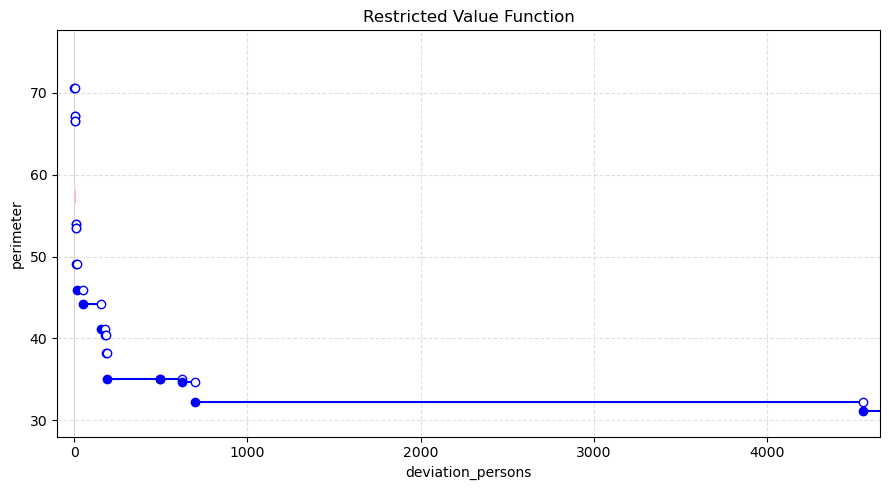

In [17]:
from pareto import ParetoFrontier

print(f"\n{'#' * 100}\nPareto Frontier for state {state},  objective {obj_type}\n{'#' * 100}\n")
pareto = ParetoFrontier(senses, obj_names, state=state, level='county')

if not  plans:
    print("No plan found!")
else:
    for plan, obj_bound, dev in result:
        upper_bound = [dev,  1/obj_bound[0] if  obj_type == 'bottleneck_Polsby_Popper' else obj_bound[0]]
        lower_bound = [dev,  1/obj_bound[1] if  obj_type == 'bottleneck_Polsby_Popper' else obj_bound[1]]
        
        pareto.add_plan(plan, upper_bound, lower_bound)
            
print("Pareto front plans:", pareto.plans)
print("Pareto front upper bounds:", pareto.upper_bounds)
print("Pareto front lower bounds:", pareto.lower_bounds) 

extra_points = None
extra_colors = None
        
pareto.tighten_lower_bounds()

if infeasible_region[1] > 0.5:
    max_dev = max(upper_bound[0] for upper_bound in pareto.upper_bounds)
    max_obj = max(upper_bound[1] for upper_bound in pareto.upper_bounds)
    min_obj = min(upper_bound[1] for upper_bound in pareto.upper_bounds)
    o1lim=[-100, max_dev+100]
    o2lim=[min_obj*0.9, max_obj*(1.1)]
else:
    o1lim = None
    o2lim = None

pareto.plot_with_custom_x_ranges(method = 'epsilon_constraint_method', splits=None,
                                 o1lim=o1lim, o2lim=o2lim, infeasible_region = infeasible_region,
                                 extra_points=extra_points, extra_colors=extra_colors)


####################################################################################################
Pareto maps for state NE, objective perimeter
####################################################################################################



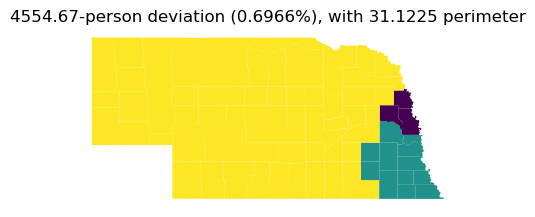

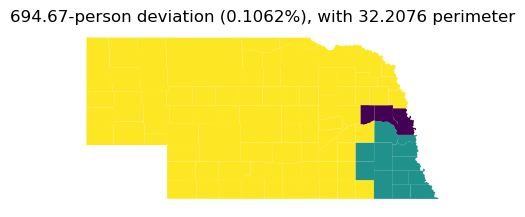

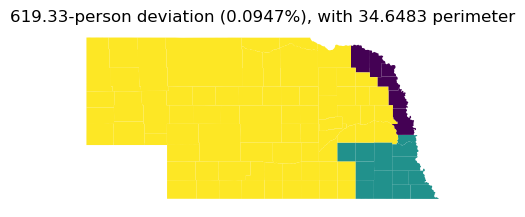

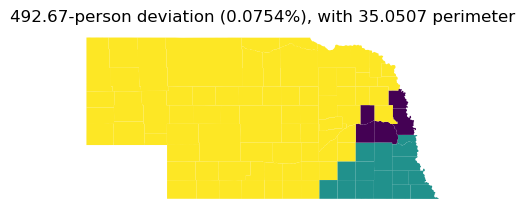

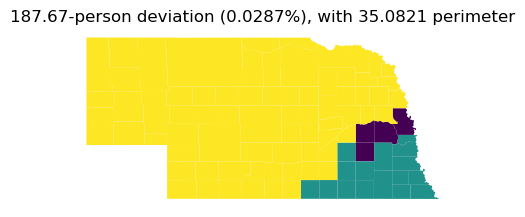

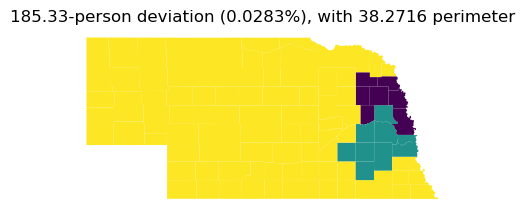

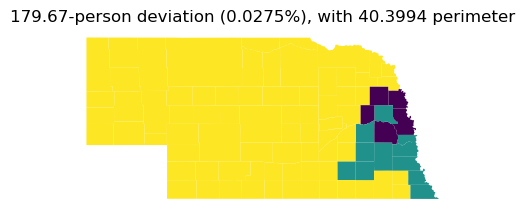

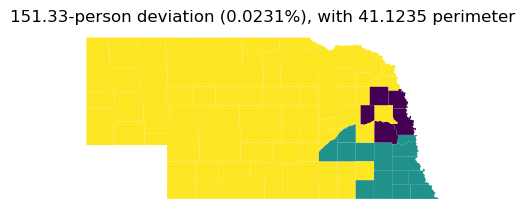

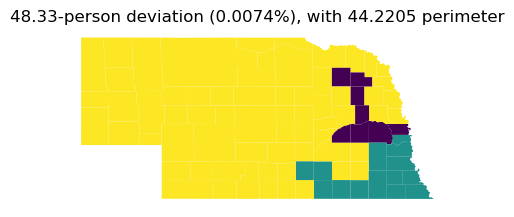

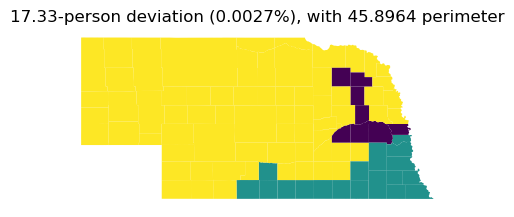

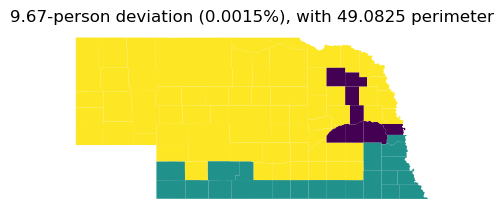

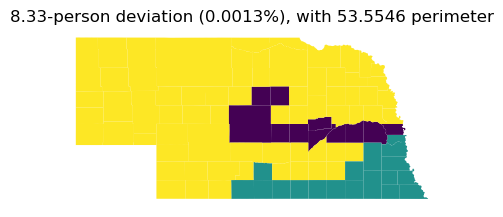

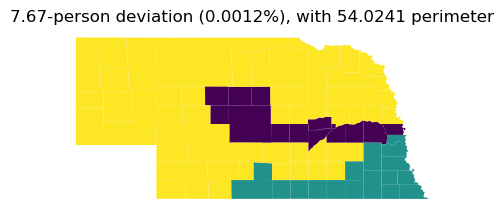

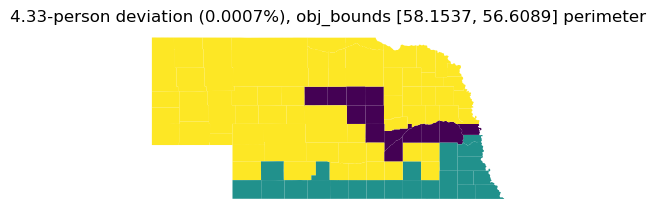

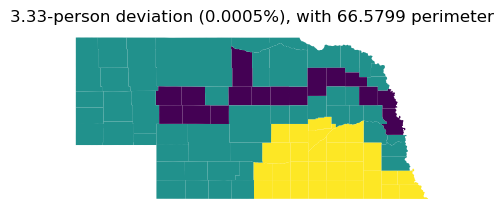

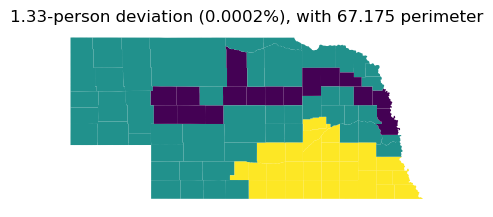

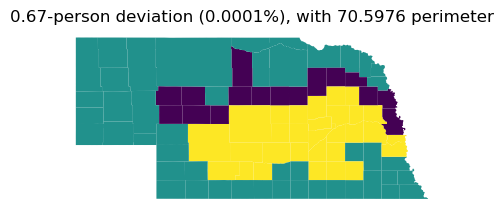

In [13]:
from draw import *

print(f"\n{'#' * 100}\nPareto maps for state {state}, objective {obj_type}\n{'#' * 100}\n")

format_obj = {
    'bottleneck_Polsby_Popper': lambda x: round(1 /x, 4),
    'cut_edges': lambda x: round(x, 0)}

for plan, obj_bound, dev in result:
    ub = format_obj.get(obj_type, lambda x: round(x, 4))(obj_bound[0])
    lb = format_obj.get(obj_type, lambda x: round(x, 4))(obj_bound[1])
    deviation_percentage = round(100 * dev / G._ideal_population, 4)
    if ub != lb:
        title = f"{round(dev, 2)}-person deviation ({deviation_percentage}%), obj_bounds [{ub}, {lb}] {obj_type}"
    else:
        title = f"{round(dev, 2)}-person deviation ({deviation_percentage}%), with {ub} {obj_type}"

    draw_plan(filepath, filename2, G, plan, title=title, year=year)